In [1]:
import numpy as np
import pylab as plt
import pyaudio
import copy as cp
from datetime import datetime

# Get Data

In [2]:
f = open('vostok.1999.temp.csv.txt')
Depth = []
Temp = []
Age = []
Deterieum = []
i=0
for line in f:
    if i>0:
        (a,b,c,d) = line.split('\t')
        Depth.append(float(a))
        Age.append(float(b))
        Temp.append(float(d))
        Deterieum.append(float(c))
    i+=1

# Plot it

Text(0, 0.5, 'Temp [$^\\circ$C]')

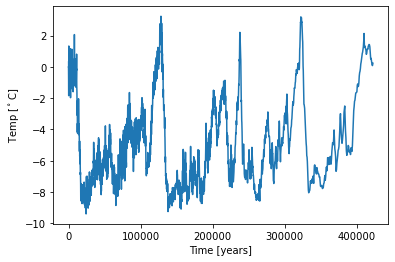

In [3]:
f = plt.figure()
ax = plt.gca()
ax.plot(Age, Temp)
ax.set_xlabel('Time [years]')
ax.set_ylabel(r'Temp [$^\circ$C]')

We want to ask questions such as "What is the temporal variability of this time serie ? Over what period of time does it vary ? What is noise, what is not ? What does it look like if we remove noise ? 

# Fourier Transform

General idea : any periodic signal can be decomposed into a sum of sinus functions

$f(t) = \sum_{i=1}^N{A_i \sin(\omega_i t + \phi_i})$


$\omega$ is the pulsation, with $\omega = 2 \pi f = \frac{2 \pi}{T}$ and f the frequency, T the period. $\phi$ is the phase, A the amplitude

Text(0.5, 0, 'x')

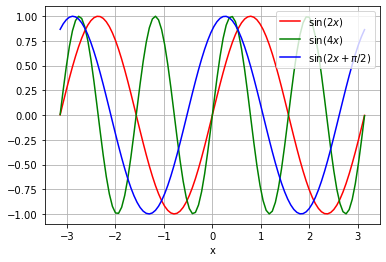

In [4]:
f = plt.figure()
ax = f.add_subplot(1,1,1)
ax.plot(np.linspace(-3.14, 3.14, 100),  np.sin(2*np.linspace(-3.14, 3.14, 100)), 'r', label = r'$\sin(2x)$')
ax.plot(np.linspace(-3.14, 3.14, 100),  np.sin(4*np.linspace(-3.14, 3.14, 100)), 'g', label = r'$\sin(4x)$')

ax.plot(np.linspace(-3.14, 3.14, 100),  np.sin(np.pi/3+2*np.linspace(-3.14, 3.14, 100)), 'b', label = r'$\sin(2x+\pi/2)$')
ax.grid()
ax.legend()
ax.set_xlabel('x')

## Exemple 

In [5]:
ts = np.linspace(0, 75, 500)
fs1 = np.sin(2*np.pi/5*ts) 
fs2 = 0.7*np.sin(2*np.pi/3*ts) 
fs3 = 3*np.sin(2*np.pi/20*ts)

Text(0.5, 1.0, '$f(t) = 3 \\sin(\\frac{2 \\pi}{20} t)+0.7 \\sin(\\frac{2 \\pi}{3} t)+\\sin(\\frac{2 \\pi}{5} t)$')

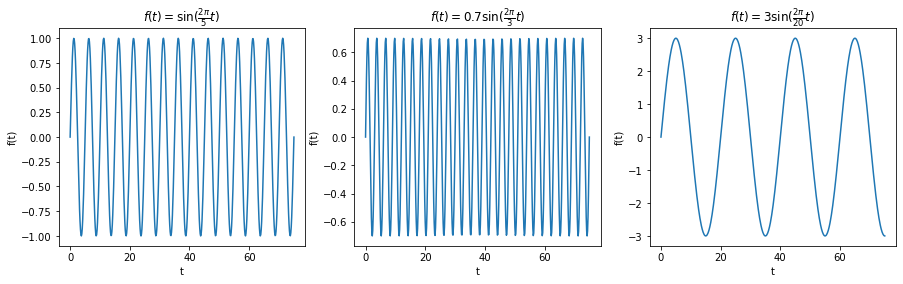

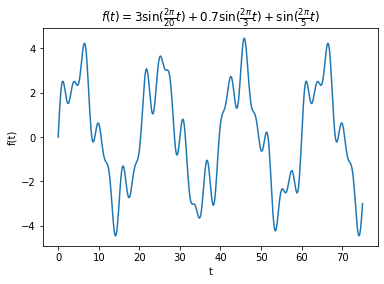

In [6]:
f = plt.figure(figsize = (15, 4))
ax = f.add_subplot(1, 3, 1)
ax.plot(ts, fs1)
ax.set_xlabel('t')
ax.set_ylabel(r'f(t)')
ax.set_title(r'$f(t) = \sin(\frac{2 \pi}{5} t)$')
ax = f.add_subplot(1, 3, 2)
ax.plot(ts, fs2)
ax.set_xlabel('t')
ax.set_ylabel(r'f(t)')
ax.set_title(r'$f(t) = 0.7 \sin(\frac{2 \pi}{3} t)$')
ax = f.add_subplot(1, 3, 3)
ax.plot(ts, fs3)
ax.set_xlabel('t')
ax.set_ylabel(r'f(t)')
ax.set_title(r'$f(t) = 3 \sin(\frac{2 \pi}{20} t)$')

f = plt.figure()
ax = plt.gca()
ax.plot(ts, fs1+fs2+fs3)
ax.set_xlabel('t')
ax.set_ylabel(r'f(t)')
ax.set_title(r'$f(t) = 3 \sin(\frac{2 \pi}{20} t)+0.7 \sin(\frac{2 \pi}{3} t)+\sin(\frac{2 \pi}{5} t)$')

## Why do we care ? How do we use it ? 

### Characterise a signal

Exemple with sound : a sound is a pressure wave at a certain frequency. Usually, an instrument is tuned at 440 Hz, which means 440 vibrations per seconds on your tympans. Now, there is a difference betweem a violin at 440 Hz and a piano at 440Hz, even though both have the same frequency of vibration. Let's play a bit with a toy signal so we understand where it comes from. 

3 440 1.0
5 1320 0.3333333333333333
7 2200 0.2
3 440 1.0
5 1320 0.1111111111111111
7 2200 0.04
9 3080 0.02040816326530612


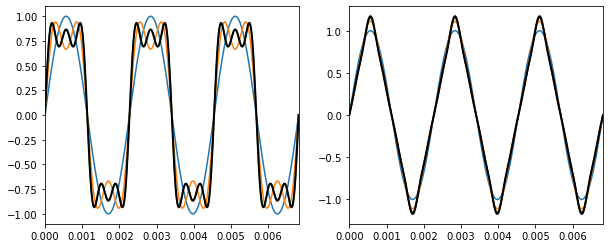

In [34]:
N1=3 #number of sinus we want to add together
N2 = 4
s = 3
listet = np.linspace(0, s, s*440*110)
f = plt.figure(figsize = (10, 4))

#signal 1
yy1=np.zeros(s*440*110)
mult=1
f0=440
A0=1
Amps1 = []
Freqs1 = []
Phase1 = []
puissanceA=1#signal carré--1, signal triangle--2
puissanceB=0#signal carré--0, signal triangle--1
ax = f.add_subplot(1,2,1)
for n in range(N1):
    f1 = f0*mult
    A1 = A0/mult**puissanceA
    mult=mult+2
    print(mult, f1, A1)
    y1 = (-1)**(n*puissanceB)*A1*np.sin(np.pi/180*360*f1*listet)
    Amps1.append(A1)
    Freqs1.append(f1)
    Phase1.append((-1)**(n*puissanceB))
    yy1=y1+yy1
    ax.plot(listet,yy1)
ax.plot(listet,yy1,'-k', linewidth = 2)
ax.set_xlim([0, 3/440])

#signal 2
yy2=np.zeros(s*440*110)
mult=1
f0=440
A0=1
puissanceA=2#signal carré--1, signal triangle--2
puissanceB=1#signal carré--0, signal triangle--1
Amps2 = []
Freqs2 = []
Phase2 = []
ax = f.add_subplot(1,2,2)
for n in range(N2):
    f1 = f0*mult
    A1 = A0/mult**puissanceA
    mult=mult+2
    print(mult, f1, A1)
    y1 = (-1)**(n*puissanceB)*A1*np.sin(np.pi/180*360*f1*listet)
    Amps2.append(A1)
    Freqs2.append(f1)
    Phase2.append((-1)**(n*puissanceB))
    yy2=y1+yy2
    ax.plot(listet,yy2)
ax.plot(listet,yy2, '-k', linewidth = 2)
ax.set_xlim([0, 3/440])
########################### Make sounds
fs = 44100    
volume= 1

p = pyaudio.PyAudio()
samples = yy1.astype(np.float32)
stream = p.open(format=pyaudio.paFloat32,
                channels=1,
                rate=fs,
                output=True)

stream.write(volume*samples)
stream.stop_stream()
stream.close()
p.terminate()

p = pyaudio.PyAudio()
samples = yy2.astype(np.float32)
stream = p.open(format=pyaudio.paFloat32,
                channels=1,
                rate=fs,
                output=True)

stream.write(volume*samples)
stream.stop_stream()
stream.close()
p.terminate()

###############################################################################

So in fine, we just need to know which sinus/cosinus are added to the signal to characterise its sound : it's main frequency (the pitch) and its "color" (the difference between flute and violin e.g.) 

How do we characterize a sinus and cosius ? What do we need to describe which sinus and cosinus added ?

(0.0, 5500.0)

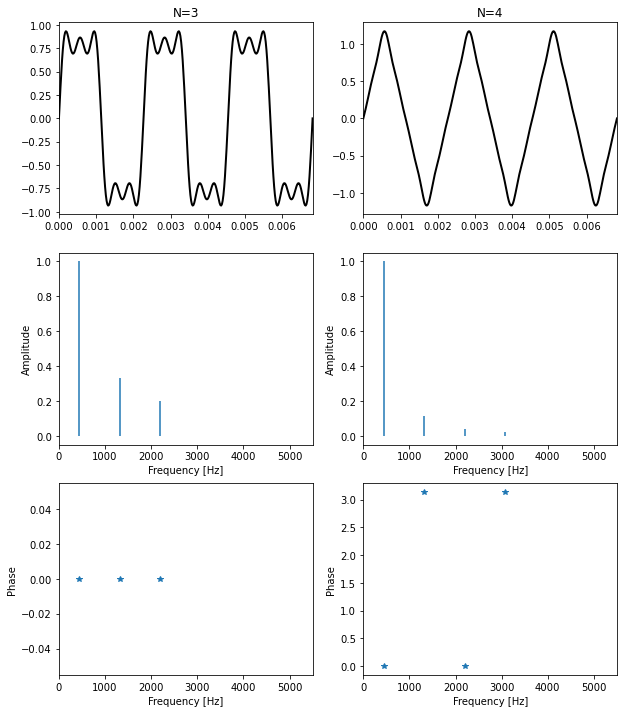

In [8]:
f= plt.figure(figsize = (10, 12))
ax = f.add_subplot(3,2,1)
ax.plot(listet,yy1, '-k', linewidth = 2)
ax.set_title('N='+str(N1))
ax.set_xlim([0, 3/440])
ax = f.add_subplot(3,2,2)
ax.plot(listet,yy2, '-k', linewidth = 2)
ax.set_title('N='+str(N2))
ax.set_xlim([0, 3/440])

ax = f.add_subplot(3,2,3)
ax.vlines(x = Freqs1,ymin = [0]*len(Amps1), ymax = Amps1)
ax.set_ylabel('Amplitude')
ax.set_xlabel('Frequency [Hz]')
ax.set_xlim([0, 5500])
ax = f.add_subplot(3,2,4)
ax.vlines(x = Freqs2,ymin = [0]*len(Amps2), ymax = Amps2)
ax.set_ylabel('Amplitude')
ax.set_xlabel('Frequency [Hz]')
ax.set_xlim([0, 5500])

Phase1 = np.array(Phase1)
Phase2 = np.array(Phase2)
Ph1 = np.zeros(len(Phase1))
Ph1[Phase1 ==-1] = np.pi
Ph2 = np.zeros(len(Phase2))
Ph2[Phase2 ==-1] = np.pi
ax = f.add_subplot(3,2,5)
ax.plot(Freqs1,Ph1, '*')
ax.set_ylabel('Phase')
ax.set_xlabel('Frequency [Hz]')
ax.set_xlim([0, 5500])
ax = f.add_subplot(3,2,6)
ax.plot(Freqs2, Ph2, '*')
ax.set_ylabel('Phase')
ax.set_xlabel('Frequency [Hz]')
ax.set_xlim([0, 5500])

Fourier transform : 
Ts = 1; % sampling period is one 
fs = 1/Ts; %sampling frequency
n = length(X);
FT = fft(X, n);
freq = fs*(0:(n/2))/n;
Y = ifft(X, n) ;

-> doubling frequency
-> complex signal : abs, angle

## Find the variability in a signal

In [9]:
SIC = np.load('SIC.npy')
SIC = SIC[112:]
times = np.load('times.npy')
times = times[112:]

Text(0, 0.5, 'SIE [km$^2$]')

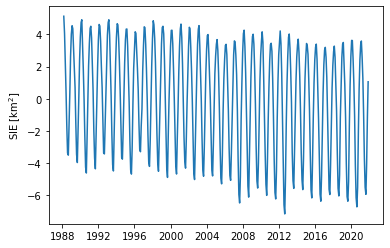

In [10]:
f = plt.figure()
ax = f.add_subplot(1,1,1)
ax.plot(times, SIC-np.mean(SIC))
ax.set_ylabel(r'SIE [km$^2$]')

In [11]:
#transform times into days
D = []
for x in times:
    D.append((x-np.datetime64('1970-01-01')).item()*1e-9*1/(24*3600))
D = np.array(D)

In [12]:
AbsS = np.abs(np.fft.rfft(SIC - np.mean(SIC)))
ArgS = np.angle(np.fft.rfft(SIC - np.mean(SIC)))
FreqS = np.fft.fftfreq(SIC.shape[0], d = D[1]-D[0])

C:\My_programs\Anaconda\envs\python3_6\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys
C:\My_programs\Anaconda\envs\python3_6\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


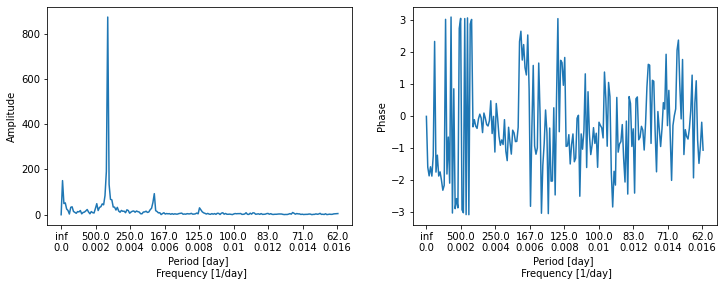

In [13]:
f = plt.figure(figsize = (12, 4))
ax = f.add_subplot(1,2,1)
ax.plot(FreqS[:len(AbsS)-1], AbsS[:-1])
ax.set_xlabel('Period [day] \n Frequency [1/day]')
ax.set_ylabel('Amplitude')
Fs =np.linspace(0, 0.016, 9)
Fs_labs = [str(np.round(1/x, 0)) + '\n' +str(x) for x in Fs]
ticks = plt.xticks(Fs, Fs_labs)

ax = f.add_subplot(1,2,2)
ax.plot(FreqS[:len(AbsS)-1], ArgS[:-1])
ax.set_xlabel('Period [day] \n Frequency [1/day]')
ax.set_ylabel('Phase')
Fs =np.linspace(0, 0.016, 9)
Fs_labs = [str(np.round(1/x, 0)) + '\n' +str(x) for x in Fs]
ticks = plt.xticks(Fs, Fs_labs)

In [14]:
def my_argmax(A, n=1): 
    return np.argsort(AbsS)[-n:]

C:\My_programs\Anaconda\envs\python3_6\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':
C:\My_programs\Anaconda\envs\python3_6\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars


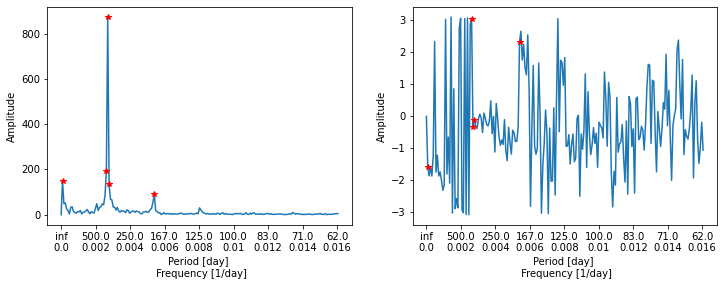

In [15]:
Inds_max_amp = my_argmax(AbsS, n=5)
f = plt.figure(figsize = (12, 4))
ax = f.add_subplot(1,2,1)
ax.plot(FreqS[:len(AbsS)-1], AbsS[:-1])
ax.plot(FreqS[:len(AbsS)-1][Inds_max_amp], AbsS[:-1][Inds_max_amp], 'r*')
ax.set_xlabel('Period [day] \n Frequency [1/day]')
ax.set_ylabel('Amplitude')
Fs =np.linspace(0, 0.016, 9)
Fs_labs = [str(np.round(1/x, 0)) + '\n' +str(x) for x in Fs]
ticks = plt.xticks(Fs, Fs_labs)

ax = f.add_subplot(1,2,2)
ax.plot(FreqS[:len(AbsS)-1], ArgS[:-1])
ax.plot(FreqS[:len(AbsS)-1][Inds_max_amp], ArgS[:-1][Inds_max_amp], 'r*')
ax.set_xlabel('Period [day] \n Frequency [1/day]')
ax.set_ylabel('Amplitude')
Fs =np.linspace(0, 0.016, 9)
Fs_labs = [str(np.round(1/x, 0)) + '\n' +str(x) for x in Fs]
ticks = plt.xticks(Fs, Fs_labs)

Text(0.5, 1.0, 'Reconstruction with main 5 frequencies')

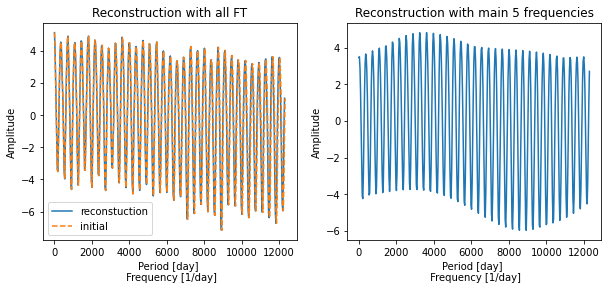

In [16]:
N = len(SIC)
dt = (D[-1]-D[0])/N
F= np.fft.irfft(AbsS*np.exp(1j*ArgS), len(SIC))
f = plt.figure(figsize = (10, 4))
ax = f.add_subplot(1,2,1)
ax.plot(dt*np.arange(len(F)), F, label = 'reconstuction')
ax.plot(D-D[0], SIC - np.mean(SIC), '--', label = 'initial')
ax.set_xlabel('Period [day] \n Frequency [1/day]')
ax.set_ylabel('Amplitude')
ax.set_title('Reconstruction with all FT')
ax.legend()

ax = f.add_subplot(1,2,2)
Abs_filtered = np.zeros(len(AbsS))
Arg_filtered = np.zeros(len(ArgS))
Abs_filtered[Inds_max_amp] = AbsS[Inds_max_amp]
Arg_filtered[Inds_max_amp] = ArgS[Inds_max_amp]
F2= np.fft.irfft(Abs_filtered*np.exp(1j*Arg_filtered), N)
ax.plot(dt*np.arange(len(F)), F2)
#ax.plot(D-D[0], SIC - np.mean(SIC), '--')
ax.set_xlabel('Period [day] \n Frequency [1/day]')
ax.set_ylabel('Amplitude')
ax.set_title('Reconstruction with main 5 frequencies')

## Limits 

There exist a theorem, called Shannon theorem, that states the limits of Discrete Fourier Transform (DFT) - between two points, one can have an infinit number of sinus passing by ! How do we chose ? 

"A discretly sample signal can correctly represent a signal only if this signal does not present any frequency superior to half of the sampling frequency (AKA Nyquist frequency)" 


See illustration on the board - That states the limits of the frequences you can spam 